# Shark Attack - Data Analysis

## Goal

The objective of this script is to analysis the global shark attack dataset, that was previously cleaned in the shark-attack-data_cleaning, to answer question like:
- What countrys have more shark attacks? Which ones have higher fatality rates?
- Is it possible to determine a typical profile of the victim? If it is, what is this profile? (Age, gender)
- What kind of activity is more vulnarable to shark attacks? What are most fatals?
- Is there a trend of raise or decrease in the number cases over the years?

### Considerations
This analysis will focus on the last 50 years of records, from 1969 to 2018.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the cleaned .csv file

In [2]:
#read the .csv data file
#encoding is 'latin-1', if leave encoding at default value, it gives error
df = pd.read_csv('data/attacks_cleaned.csv', encoding='latin-1')
df.head()

,Year,Type,Country,Area,Location,Activity,Gender,Age,Fatal (Y/N)
0,2018.0,"Valid, but unknown",USA,California,"Oceanside, San Diego County",paddling,F,57.0,N
1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",standing,F,11.0,N
2,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,surfing,M,NaN,N
3,2018.0,Provoked,MEXICO,Colima,La Ticla,diving,M,NaN,N
4,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",surfing,M,NaN,N


In [3]:
#df_country
df_country = pd.DataFrame(df.groupby(by = 'Country').count()['Fatal (Y/N)'], ).sort_values('Fatal (Y/N)', ascending = False)
df_country.rename(columns={'Fatal (Y/N)' : 'total_attacks'}, inplace=True)
df_country.head()

,total_attacks
Country,
USA,1501
AUSTRALIA,528
SOUTH AFRICA,324
BRAZIL,94
BAHAMAS,78


In [4]:
df_country['fatal'] = df[df['Fatal (Y/N)'] == 'Y'].groupby('Country').count()['Fatal (Y/N)']
df_country.sort_values('fatal', ascending=False).head()

,total_attacks,fatal
Country,,
AUSTRALIA,528,64.0
USA,1501,50.0
SOUTH AFRICA,324,41.0
BRAZIL,94,31.0
REUNION,56,26.0


In [5]:
df_country['fatality_rate'] = df_country['fatal']/df_country['total_attacks']
df_country.sort_values('total_attacks', ascending=False).head().sort_values('fatality_rate', ascending=False).head()

,total_attacks,fatal,fatality_rate
Country,,,
BRAZIL,94,31.0,0.329787
SOUTH AFRICA,324,41.0,0.126543
AUSTRALIA,528,64.0,0.121212
USA,1501,50.0,0.033311
BAHAMAS,78,2.0,0.025641


In [66]:
df_country['male_total'] = df[df['Gender'] == 'M'].groupby('Country').count()['Gender']
df_country['male_fatal'] = df[(df['Gender'] == 'M') & (df['Fatal (Y/N)'] == 'Y')].groupby('Country').count()['Gender']
df_country['male_fatality_rate'] = df_country['male_fatal']/df_country['male_total']
df_country['female_total'] = df[df['Gender'] == 'F'].groupby('Country').count()['Gender']
df_country['female_fatal'] = df[(df['Gender'] == 'F') & (df['Fatal (Y/N)'] == 'Y')].groupby('Country').count()['Gender']
df_country['female_fatality_rate'] = df_country['female_fatal']/df_country['female_total']
df_country.head(10)

,total_attacks,fatal,fatality_rate,male_total,male_fatal,male_fatality_rate,female_total,female_fatal,female_fatality_rate
Country,,,,,,,,,
USA,1501,50.0,0.033311,1172.0,40.0,0.034130,281.0,10.0,0.035587
AUSTRALIA,528,64.0,0.121212,431.0,57.0,0.132251,53.0,7.0,0.132075
SOUTH AFRICA,324,41.0,0.126543,282.0,37.0,0.131206,10.0,3.0,0.300000
BRAZIL,94,31.0,0.329787,79.0,27.0,0.341772,4.0,1.0,0.250000
BAHAMAS,78,2.0,0.025641,64.0,2.0,0.031250,13.0,NaN,NaN
REUNION,56,26.0,0.464286,48.0,20.0,0.416667,2.0,2.0,1.000000
NEW ZEALAND,51,5.0,0.098039,37.0,4.0,0.108108,7.0,1.0,0.142857
NEW CALEDONIA,43,13.0,0.302326,25.0,9.0,0.360000,3.0,2.0,0.666667
MEXICO,36,14.0,0.388889,29.0,12.0,0.413793,6.0,1.0,0.166667


In [7]:
df.groupby('Country').agg({'Age': ['mean', 'median']})

Age       
                    mean median
Country                        
 TONGA          69.00000   69.0
ANGOLA               NaN    NaN
ARUBA           58.00000   58.0
ATLANTIC OCEAN       NaN    NaN
AUSTRALIA       30.86376   29.0
...                  ...    ...
VANUATU         12.00000    8.0
VENEZUELA       37.00000   34.0
VIETNAM         46.60000   57.0
WESTERN SAMOA   25.00000   25.0
YEMEN                NaN    NaN

[109 rows x 2 columns]

In [68]:
df_country2 = pd.merge(left=df_country, right=df.groupby('Country').agg({'Age': ['mean', 'median']}), on='Country', how='left')
df_country2.head(10)

<ipython-input-68-45357de9523f>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  df_country2 = pd.merge(left=df_country, right=df.groupby('Country').agg({'Age': ['mean', 'median']}), on='Country', how='left')


,total_attacks,fatal,fatality_rate,male_total,male_fatal,male_fatality_rate,female_total,female_fatal,female_fatality_rate,"(Age, mean)","(Age, median)"
Country,,,,,,,,,,,
USA,1501,50.0,0.033311,1172.0,40.0,0.034130,281.0,10.0,0.035587,26.988889,22.0
AUSTRALIA,528,64.0,0.121212,431.0,57.0,0.132251,53.0,7.0,0.132075,30.863760,29.0
SOUTH AFRICA,324,41.0,0.126543,282.0,37.0,0.131206,10.0,3.0,0.300000,27.091304,25.0
BRAZIL,94,31.0,0.329787,79.0,27.0,0.341772,4.0,1.0,0.250000,23.537037,21.0
BAHAMAS,78,2.0,0.025641,64.0,2.0,0.031250,13.0,NaN,NaN,36.759259,35.5
REUNION,56,26.0,0.464286,48.0,20.0,0.416667,2.0,2.0,1.000000,29.200000,27.0
NEW ZEALAND,51,5.0,0.098039,37.0,4.0,0.108108,7.0,1.0,0.142857,25.708333,23.5
NEW CALEDONIA,43,13.0,0.302326,25.0,9.0,0.360000,3.0,2.0,0.666667,33.235294,31.0
MEXICO,36,14.0,0.388889,29.0,12.0,0.413793,6.0,1.0,0.166667,32.851852,33.0


<AxesSubplot:xlabel='Country', ylabel='total_attacks'>

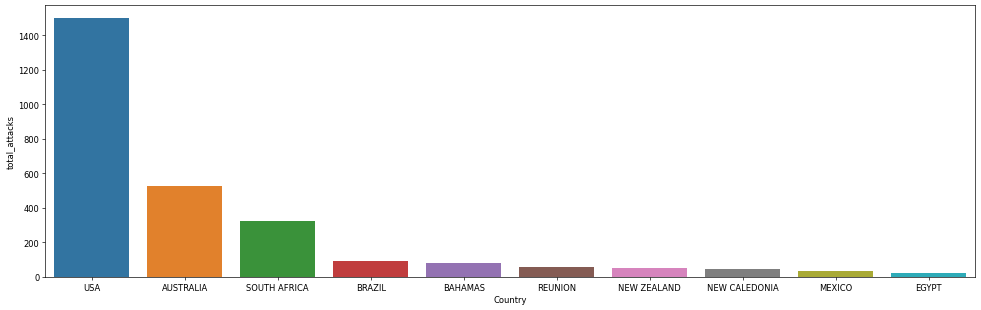

In [62]:
plt.figure(figsize=(20, 6), dpi=60)
sns.barplot(x=df_country2.head(10).index, y='total_attacks', data=df_country2.head(10))


<AxesSubplot:xlabel='Country', ylabel='fatal'>

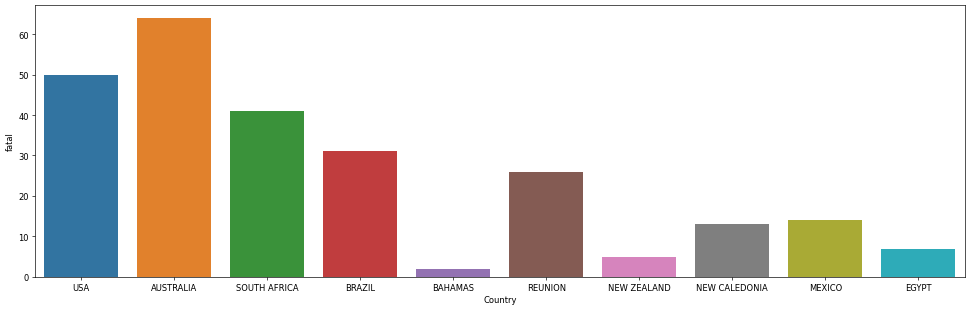

In [63]:
plt.figure(figsize=(20, 6), dpi=60)
sns.barplot(x=df_country2.head(10).index, y='fatal', data=df_country2.head(10))

<AxesSubplot:xlabel='Country', ylabel='fatality_rate'>

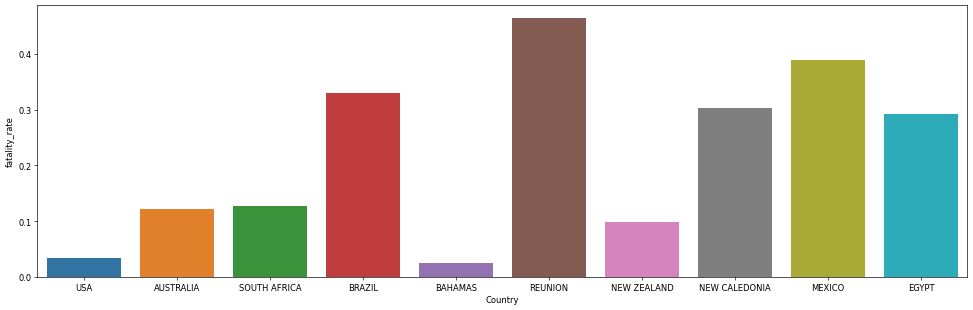

In [65]:
plt.figure(figsize=(20, 6), dpi=60)
sns.barplot(x=df_country2.head(10).index, y='fatality_rate', data=df_country2.head(10))

In [9]:
df.Activity.value_counts()

surfing     1183
fishing      503
swimming     480
other        380
diving       257
unknown      164
wading       111
standing      66
paddling      24
Name: Activity, dtype: int64

In [10]:
df_activity = pd.DataFrame(df.groupby(by = 'Activity').count()['Fatal (Y/N)']).sort_values('Fatal (Y/N)', ascending = False)
df_activity.rename(columns={'Fatal (Y/N)' : 'total_attacks'}, inplace=True)
df_activity['fatal'] = df[df['Fatal (Y/N)'] == 'Y'].groupby('Activity').count()['Fatal (Y/N)']
df_activity['fatal_rate'] = df_activity['fatal']/df_activity['total_attacks']
df_activity.sort_values('fatal_rate', ascending = False)

,total_attacks,fatal,fatal_rate
Activity,,,
diving,257,57,0.221790
swimming,480,105,0.218750
unknown,164,29,0.176829
other,380,61,0.160526
fishing,503,48,0.095427
surfing,1183,72,0.060862
paddling,24,1,0.041667
wading,111,4,0.036036
standing,66,1,0.015152
